In [194]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster as cluster
import time
import hdbscan
%matplotlib inline
sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}

In [195]:
plot_x, plot_y = 0, 1

In [196]:
reader=csv.reader(open(r'local_data/arrs_simple_with_feature_3.csv','rb'))

In [197]:
data_array=list(reader)

In [198]:
data=np.array(data_array).astype('float')

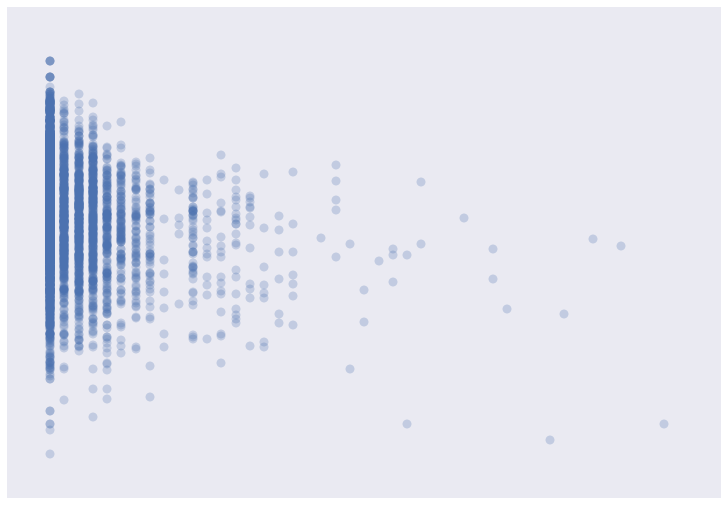

In [199]:
plt.scatter(data.T[plot_x], data.T[plot_y], c='b', **plot_kwds)
frame = plt.gca()
frame.axes.get_xaxis().set_visible(False)
frame.axes.get_yaxis().set_visible(False)

In [200]:
def plot_clusters(data, all_data, algorithm, args, kwds):
    start_time = time.time()
    labels = algorithm(*args, **kwds).fit_predict(data)
    end_time = time.time()
    palette = sns.color_palette('deep', np.unique(labels).max() + 1)
    colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
    plt.scatter(all_data.T[plot_x], all_data.T[plot_y], c=colors, **plot_kwds)
    frame = plt.gca()
#     frame.axes.get_xaxis().set_visible(False)
#     frame.axes.get_yaxis().set_visible(False)
    plt.title('Clusters found by {}'.format(str(algorithm.__name__)), fontsize=24)
    plt.text(-0.5, 0.7, 'Clustering took {:.2f} s'.format(end_time - start_time), fontsize=14)

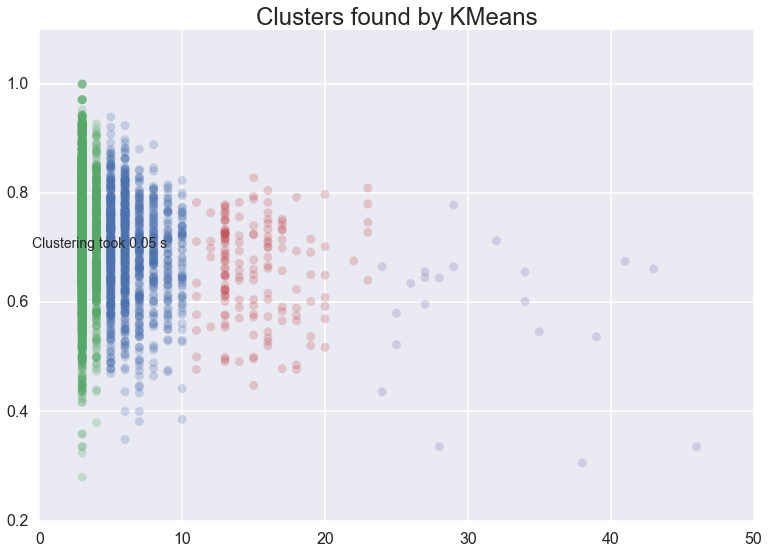

In [201]:
plot_clusters(data[:,:], data, cluster.KMeans, (), {'n_clusters':4})

In [202]:
# plot_clusters(data, cluster.AffinityPropagation, (), {'preference':-5.0, 'damping':0.95})

In [203]:
# plot_clusters(data[:,:], data, cluster.SpectralClustering, (), {'n_clusters':4})

In [204]:
# plot_clusters(data[:,1:], data, cluster.AgglomerativeClustering, (), {'n_clusters':4, 'linkage':'ward'})

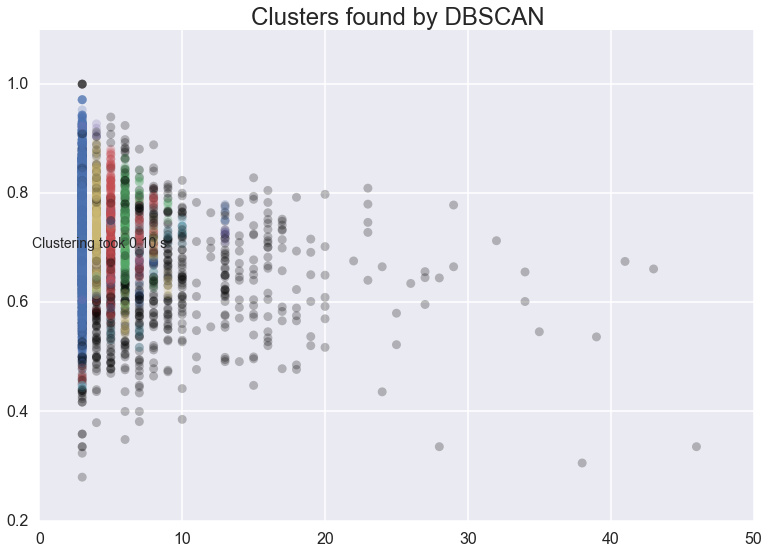

In [205]:
plot_clusters(data[:,:], data, cluster.DBSCAN, (), {'eps':0.025})

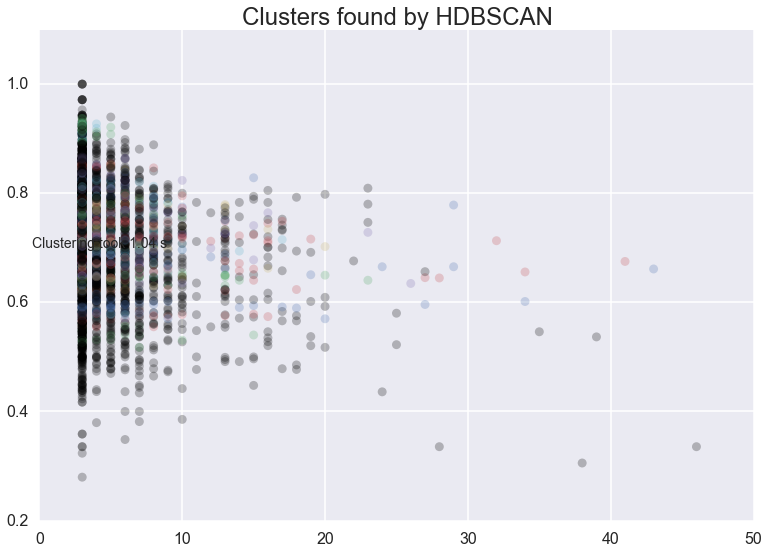

In [206]:
plot_clusters(data[:,1:], data, hdbscan.HDBSCAN, (), {'min_cluster_size':15})